In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
from scipy import stats
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt
from turtle import title



# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", pool_pre_ping=True)

In [41]:
# reflect an existing database into a new model
Base = automap_base()

In [42]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:

# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent = pd.to_datetime(most_recent[0])
day = int(most_recent.strftime("%d"))
month = int(most_recent.strftime("%m"))
year = int(most_recent.strftime("%Y"))

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year_prior = dt.date(year, month, day) - dt.timedelta(365) 
session.query( Measurement.id, Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_prior).\
    order_by(Measurement.date).all()
    
    

[(2365, '2016-08-24', 0.08),
 (5092, '2016-08-24', 2.15),
 (7332, '2016-08-24', 2.28),
 (8826, '2016-08-24', None),
 (11852, '2016-08-24', 1.22),
 (14609, '2016-08-24', 2.15),
 (19203, '2016-08-24', 1.45),
 (2366, '2016-08-25', 0.08),
 (5093, '2016-08-25', 0.08),
 (7333, '2016-08-25', 0.0),
 (8827, '2016-08-25', 0.0),
 (11853, '2016-08-25', 0.21),
 (14610, '2016-08-25', 0.06),
 (19204, '2016-08-25', 0.11),
 (2367, '2016-08-26', 0.0),
 (5094, '2016-08-26', 0.03),
 (7334, '2016-08-26', 0.02),
 (8828, '2016-08-26', 0.04),
 (11854, '2016-08-26', 0.0),
 (14611, '2016-08-26', 0.01),
 (2368, '2016-08-27', 0.0),
 (5095, '2016-08-27', 0.18),
 (7335, '2016-08-27', 0.02),
 (11855, '2016-08-27', 0.0),
 (14612, '2016-08-27', 0.12),
 (19205, '2016-08-27', None),
 (2369, '2016-08-28', 0.01),
 (5096, '2016-08-28', 0.14),
 (7336, '2016-08-28', 0.14),
 (11856, '2016-08-28', 0.14),
 (14613, '2016-08-28', 0.6),
 (19206, '2016-08-28', 2.07),
 (2370, '2016-08-29', 0.0),
 (5097, '2016-08-29', 0.17),
 (7337, 

In [48]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("One year before most recent measurement: ", query_date)


One year before most recent measurement:  2016-08-23


In [49]:
# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()


In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year_data, columns=['date','prcp'])
last_year_df.set_index('date', inplace=True)


In [51]:
# Sort the dataframe by date
last_year_df.sort_index()
last_year_df

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'precipitation')

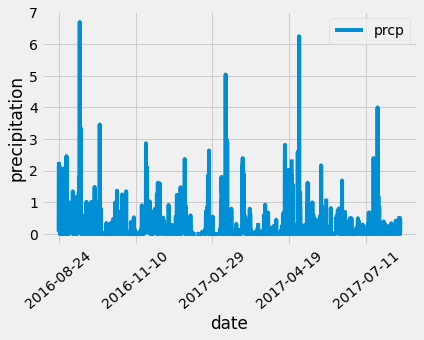

In [52]:

# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot(rot=40)
plt.xlabel('date')
plt.ylabel('precipitation')

In [56]:
# Use Pandas to calculate the summary statistics for the precipitation data
# last_year_df.describe()

last_year_df.agg(
        {
            "prcp": ["min", "max", "mean"]
            
        }
                )

,prcp
min,0.000000
max,6.700000
mean,0.176462


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [58]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).order_by(func.count(Measurement.station).desc()).group_by(Measurement.station).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from audioop import avg

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
    
    

[(54.0, 85.0, 71.66378066378067)]

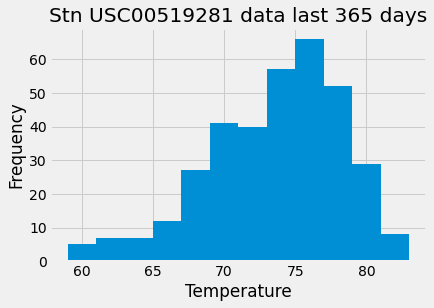

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


last_year_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
    
hist_df = pd.DataFrame(last_year_data)
    
hist = hist_df.hist(column='tobs', bins=12)
plt.title("Stn USC00519281 data last 365 days")
plt.ylabel("Frequency")
plt.xlabel('Temperature')
plt.show()

# Close session

In [60]:
# Close Session
session.close()